In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

# Modelos no Supervisados

________

## K-Means

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

El algoritmo consta de tres pasos:

1. Inicialización: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.
2. Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.
3. Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.

El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

<img align="center" width="800" height="300" src="https://i.imgur.com/aDTF2cZ.png">


In [31]:
iris = pd.read_csv('data/samples/Iris.csv')
iris.head()
x = iris.iloc[:, [1, 2, 3, 4]].values

Inicialmente se verifica el numero de clusters a crear, esto se hace mediante un grafico de sedimentacion

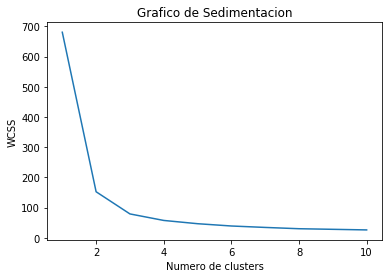

In [34]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
        
plt.plot(range(1, 11), wcss)
plt.title('Grafico de Sedimentacion')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

Se toma como numero de clusters el punto donde la suma de cuadrados al interior del cluster (WCSS) deja de decrecer signifcativamente.

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [37]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

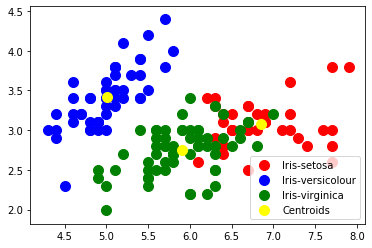

In [38]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

________

## Metodos Jerárquicos

Los llamados métodos jerárquicos tienen por objetivo agrupar clúster para formar uno nuevo o bien separar alguno ya existente para dar origen a otros dos, de tal forma que, si sucesivamente se va efectuando este proceso de aglomeración o división, se minimice alguna distancia o bien se maximice alguna medida de similitud.
Los métodos jerárquicos se subdividen en aglomerativos y disociativos. Cada una de estas categorías presenta una gran diversidad de variantes.

1. Los métodos jerárquicos aglomerativos comienzan con tantos clusters como objetos tengamos que clasificar y en cada paso se recalculan las distancias entre los grupos existentes y se unen los dos grupos más similares o menos disimilares. El algoritmo acaba con un clúster conteniendo todos los elementos.

2. Los métodos jerárquicos divisivos comienzan con un clúster que engloba a todos los elementos y en cada paso se divide el grupo más heterogéneo. El algoritmo acaba con tantos clusters (de un elemento cada uno) como objetos se hayan clasificado.
Indepedientemente del proceso de agrupamiento, hay diversos criterios para ir formando los clusters; todos estos criterios se basan en una matriz de distancias o similitudes.

<img align="center" width="400" height="300" src="https://www.researchgate.net/profile/Medhat_Mahmoud/publication/310140193/figure/fig3/AS:428284455460867@1479122379235/the-three-linkage-methods.png">

Los pasos en el metodo aglometarivo son:

1. Se forma la division inicial donde cada elemento es un cluster
2. Se unen los clusters segun el critetrio establecido (linkage) y los agrupan en uno solo cluster
3. Se repiten los pasos anteriores hasta tener la division final

El resultado final se puede visualizar en un ___dendograma___

<img align="center" width="800" height="300" src="https://www.researchgate.net/profile/Enrique_J_De_La_Hoz/publication/331462041/figure/fig1/AS:731967347773440@1551526023007/Dendograma-para-3-grupos-con-el-metodo-Ward.ppm">




El eje y es adimensional y muestra el punto de corte por el cual se espera obtener el numero de clusters deseado

Con el mismo conjunto de datos se procede a cear segmentos mediante el metodo jerarquico

In [8]:
iris = pd.read_csv('data/samples/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [10]:
iris.drop('Species', axis=1, inplace=True) 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
#help(linkage)

In [15]:
Z = linkage(iris, 'ward')

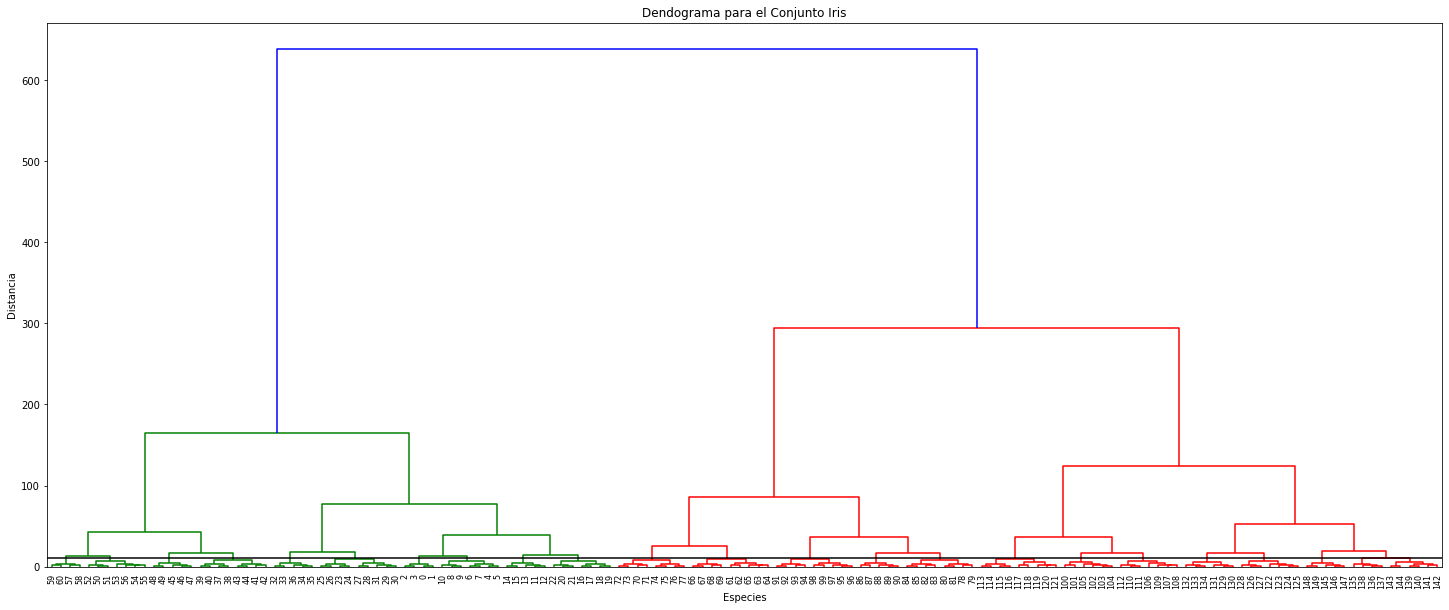

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Dendograma para el Conjunto Iris')
plt.xlabel('Especies')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # Solo muestra los clusters unidos
    p=150,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,      
)
plt.axhline(y=10, c='k')
plt.show()

In [17]:
Z = linkage(iris, 'single')

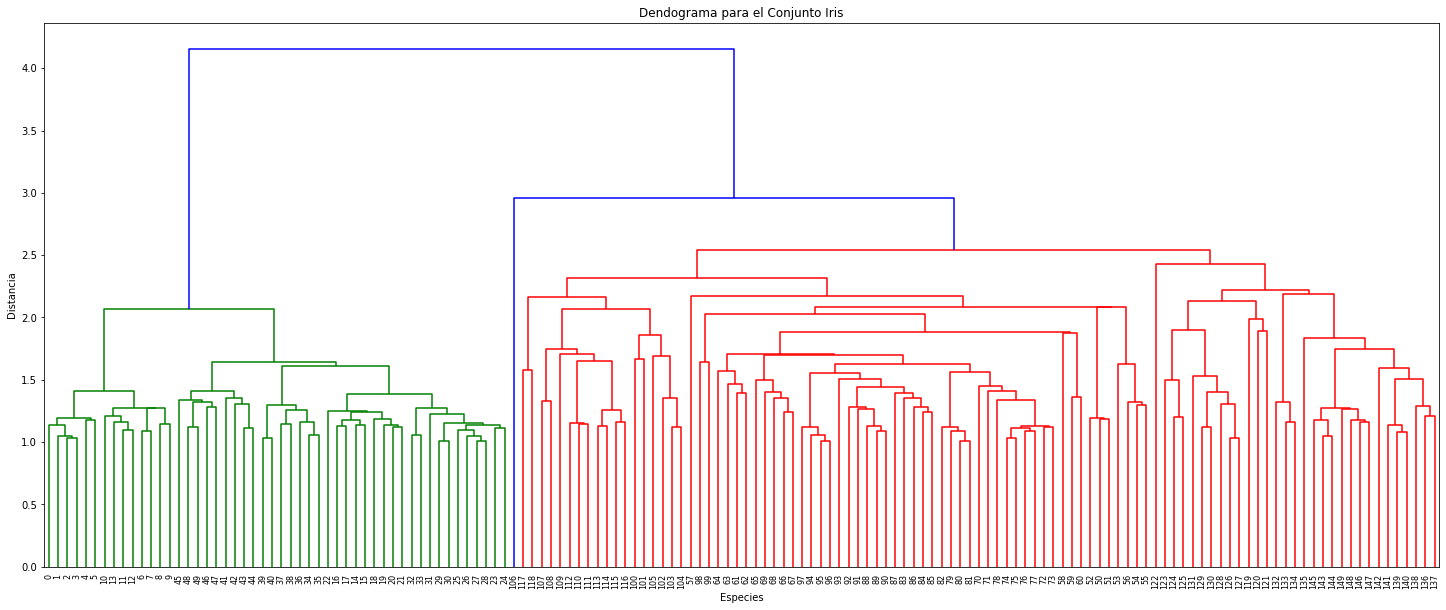

In [18]:
plt.figure(figsize=(25, 10))
plt.title('Dendograma para el Conjunto Iris')
plt.xlabel('Especies')
plt.ylabel('Distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # Solo muestra los clusters unidos
    p=150,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,      
)
plt.axhline(y=10, c='k')
plt.show()